In [10]:
import pandas as pd
import numpy as np



In [11]:
dxb_communities=pd.read_csv("Dxb_Comm_LatLon.csv")
dxb_communities.head()

,CNAME_E,COMM_NUM,SHAPE_AREA,SHAPE_LEN,lat,lon
0,AL BADA',333,1.984701e+06,7946.070175,25.225314,55.268768
1,CORNICHE DEIRA,121,8.707842e+05,5165.842443,25.287165,55.317958
2,AL KHWANEEJ SECOND,282,1.269407e+07,14582.351508,25.230697,55.521222
3,AL SAFA FIRST,353,2.430429e+06,6705.662879,25.175690,55.238309
4,NAZWAH,736,1.305883e+07,15567.139691,25.024015,55.646574


In [12]:
dxb_population_raw = pd.read_excel("Dubai Communitywise Population.xlsx", sheet_name='DxbPop')

In [13]:
dxb_population_raw.drop('Unnamed: 4', axis = 'columns', inplace = True)
dxb_population = dxb_population_raw[:226]

In [23]:
dxb_population.shape

(226, 7)

In [19]:
merged_commu_pop = pd.merge(left=dxb_communities, right=dxb_population, left_on='COMM_NUM', right_on='Community Code')

In [20]:
merged_commu_pop.drop(merged_commu_pop.columns[[0,9]], axis = 'columns', inplace = True)

In [21]:
merged_commu_pop.rename(columns={'Community_En': 'CNAME_E', 'Community_Ar': 'CNAME_A'},inplace = True)
merged_commu_pop.head()

,COMM_NUM,SHAPE_AREA,SHAPE_LEN,lat,lon,Sector,CNAME_E,CNAME_A,Pop2017,Pop2018,Pop2019
0,333,1.984701e+06,7946.070175,25.225314,55.268768,Sector 3,AL BADA,البدع,51467.0,54338.0,56734.0
1,121,8.707842e+05,5165.842443,25.287165,55.317958,Sector 1,CORNICHE DEIRA,كورنيش ديرة,14.0,14.0,14.0
2,282,1.269407e+07,14582.351508,25.230697,55.521222,Sector 2,AL KHAWANEEJ TWO,الخوانيج الثانية,2786.0,3865.0,4523.0
3,353,2.430429e+06,6705.662879,25.175690,55.238309,Sector 3,AL SAFFA FIRST,الصفا الأولى,7540.0,7893.0,8514.0
4,736,1.305883e+07,15567.139691,25.024015,55.646574,Sector 7,NAZWAH,نزوه,450.0,504.0,544.0


In [22]:
community_pop=merged_commu_pop

#community_pop.to_csv('Dxb_Community_Popn_FinalDF.csv')

community_pop["Pop2019density"] = (community_pop["Pop2019"] *1000000/ community_pop['SHAPE_AREA']) #Pop per SQKM
community_pop["PopGrowth19by18"] = ((community_pop["Pop2019"] / community_pop['Pop2018'])-1)*100

community_pop.replace(np.nan, 0, inplace = True) # Commnunities with 0 / 0 value assigned this number
community_pop.replace(np.inf, 99999, inplace = True) # Commnunities with Inf value assigned this number

community_pop.describe()



,COMM_NUM,SHAPE_AREA,SHAPE_LEN,lat,lon,Pop2017,Pop2018,Pop2019,Pop2019density,PopGrowth19by18
count,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,490.694690,2.105540e+07,15928.212597,25.119813,55.327693,13170.154867,14125.110619,14849.115044,6712.612029,603.813035
std,261.874728,4.042519e+07,14509.579155,0.146898,0.146786,24155.353167,24297.850367,24883.566435,15412.114960,6923.760207
min,101.000000,7.308970e+04,1397.451420,24.660479,54.904850,0.000000,0.000000,0.000000,0.000000,-42.164019
25%,283.250000,2.366359e+06,6779.850625,25.032402,55.239103,314.000000,419.250000,637.250000,23.334105,0.000000
50%,392.500000,6.224066e+06,10883.227338,25.153611,55.319806,4751.500000,5860.500000,6586.000000,1119.787975,5.303471
75%,680.000000,1.921986e+07,19299.326017,25.242531,55.403908,13406.000000,16723.500000,17811.500000,4560.645629,9.090909
max,991.000000,3.650142e+08,122334.492899,25.338912,56.139180,202918.000000,197838.000000,196316.000000,111380.654928,99999.000000


In [10]:
%matplotlib inline 

import matplotlib as plt
from matplotlib import pyplot

plt.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', plt.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


## Population Growth
Lets plot the histogram of Pop Growth, to see what the distribution of looks like.

Text(0.5, 1.0, 'Histogram of Communities by Pop Growth')

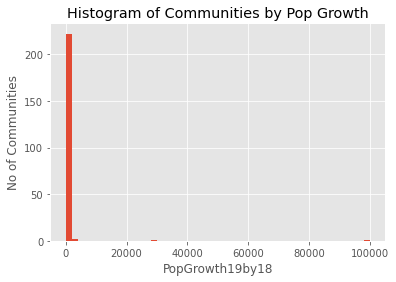

In [11]:
plt.pyplot.hist(community_pop["PopGrowth19by18"],bins=50)

# set x/y labels and plot title
plt.pyplot.xlabel("PopGrowth19by18")
plt.pyplot.ylabel("No of Communities")
plt.pyplot.title("Histogram of Communities by Pop Growth")

We build a bin array, with a minimum value to a maximum value, to segment the range into meaningful bins of Popolation Growth. 

In [12]:
# bins = np.linspace(min(community_pop["PopGrowth19by18"]), max(community_pop["PopGrowth19by18"]), 6)
# bins

In [13]:
growth_names = [     ' x <= -20', '-20< x <= -2 ', '-2 < x <=2', '2 < x <= 20', '20 < x <= 100', ' > 100']
bins_proper = [-44,         -20,             -2 ,            2,            20 ,             100 ,    9.99990000e+04]

 We apply the function "cut" the determine what each value of "df['PopGrowth19by18']" belongs to. 

In [14]:
community_pop['PopGrowthbinned'] = pd.cut(community_pop['PopGrowth19by18'], bins_proper, labels=growth_names, include_lowest=True )
#community_pop[['PopGrowth19by18','PopGrowthbinned']].head()

Lets see the number of communities in each bin.

In [15]:
#community_pop["PopGrowthbinned"].value_counts().sort_index(ascending=False).to_frame() # If the output is wanted as a frame.
community_pop["PopGrowthbinned"].value_counts().sort_index(ascending=False)

 > 100             6
20 < x <= 100      8
2 < x <= 20      131
-2 < x <=2        77
-20< x <= -2       3
 x <= -20          1
Name: PopGrowthbinned, dtype: int64

Text(0.5, 1.0, 'No. of Communities by % Pop Growth')

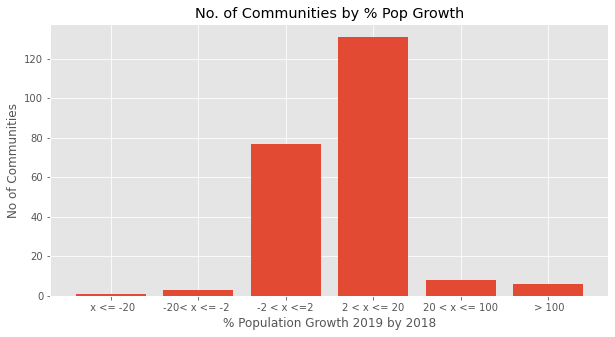

In [16]:
plt.pyplot.figure(figsize=(10, 5))
pyplot.bar(growth_names, community_pop["PopGrowthbinned"].value_counts().sort_index(ascending=True))

# set x/y labels and plot title
            
plt.pyplot.xlabel("% Population Growth 2019 by 2018")
#plt.pyplot.xticks(rotation=90)
plt.pyplot.ylabel("No of Communities")
plt.pyplot.title("No. of Communities by % Pop Growth")

## Population Density
Let us analyze the Population Density

Text(0.5, 1.0, 'Histogram of Communities by Pop Density')

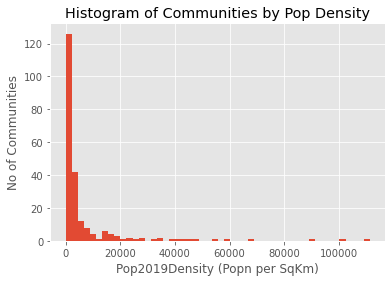

In [17]:
plt.pyplot.hist(community_pop["Pop2019density"],bins=50)

# set x/y labels and plot title
plt.pyplot.xlabel("Pop2019Density (Popn per SqKm)")
plt.pyplot.ylabel("No of Communities")
plt.pyplot.title("Histogram of Communities by Pop Density")

We build a bin array, with a minimum value to a maximum value, to segment the range into meaningful bins of Popolation Growth. 

In [18]:
density_names = [     ' x = 0', '0< x <= 10 ', '10 < x <1000', '1000 < x <= 10k', '10k < x <= 50k', ' > 50k']
bins_proper_d = [0,   .000001 ,          10 ,           1000,             10000 ,           50000 ,     150000]

We apply the function "cut" the determine what each value of "df['PopDensity2019']" belongs to. 

In [19]:
community_pop['PopDensitybinned'] = pd.cut(community_pop['Pop2019density'], bins_proper_d, labels=density_names, include_lowest=True )
community_pop[['Pop2019density','PopDensitybinned']].head()

,Pop2019density,PopDensitybinned
0,28585.672699,10k < x <= 50k
1,16.077461,10 < x <1000
2,356.308151,10 < x <1000
3,3503.085889,1000 < x <= 10k
4,41.657652,10 < x <1000


Lets see the number of communities in each bin.

In [20]:
community_pop["PopDensitybinned"].value_counts().sort_index(ascending=False).to_frame() # If the output is wanted as a frame.
#community_pop["PopDensitybinned"].value_counts().sort_index(ascending=False) # If the output is not wanted as a frame.

,PopDensitybinned
> 50k,6
10k < x <= 50k,30
1000 < x <= 10k,79
10 < x <1000,61
0< x <= 10,47
x = 0,3


Text(0.5, 1.0, 'No. of Communities by Popn Density')

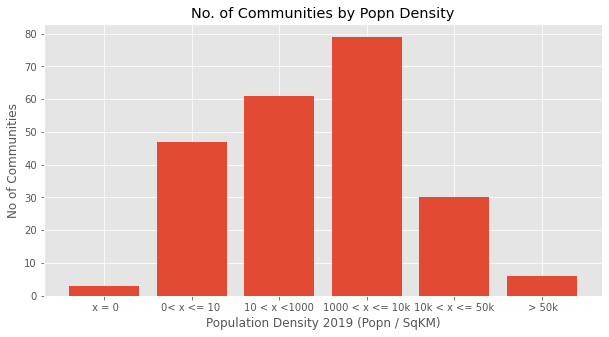

In [21]:
plt.pyplot.figure(figsize=(10, 5))
pyplot.bar(density_names, community_pop["PopDensitybinned"].value_counts().sort_index(ascending=True))

# set x/y labels and plot title
            
plt.pyplot.xlabel("Population Density 2019 (Popn / SqKM)")
#plt.pyplot.xticks(rotation=90)
plt.pyplot.ylabel("No of Communities")
plt.pyplot.title("No. of Communities by Popn Density")

# Final File with Marked Variables for Popn Density & Growth


In [22]:
community_pop.head()

,COMM_NUM,SHAPE_AREA,SHAPE_LEN,lat,lon,Sector,CNAME_E,CNAME_A,Pop2017,Pop2018,Pop2019,Pop2019density,PopGrowth19by18,PopGrowthbinned,PopDensitybinned
0,333,1.984701e+06,7946.070175,25.225314,55.268768,Sector 3,AL BADA,البدع,51467.0,54338.0,56734.0,28585.672699,4.409437,2 < x <= 20,10k < x <= 50k
1,121,8.707842e+05,5165.842443,25.287165,55.317958,Sector 1,CORNICHE DEIRA,كورنيش ديرة,14.0,14.0,14.0,16.077461,0.000000,-2 < x <=2,10 < x <1000
2,282,1.269407e+07,14582.351508,25.230697,55.521222,Sector 2,AL KHAWANEEJ TWO,الخوانيج الثانية,2786.0,3865.0,4523.0,356.308151,17.024580,2 < x <= 20,10 < x <1000
3,353,2.430429e+06,6705.662879,25.175690,55.238309,Sector 3,AL SAFFA FIRST,الصفا الأولى,7540.0,7893.0,8514.0,3503.085889,7.867731,2 < x <= 20,1000 < x <= 10k
4,736,1.305883e+07,15567.139691,25.024015,55.646574,Sector 7,NAZWAH,نزوه,450.0,504.0,544.0,41.657652,7.936508,2 < x <= 20,10 < x <1000


Text(0.5, 1.0, 'Scatter')

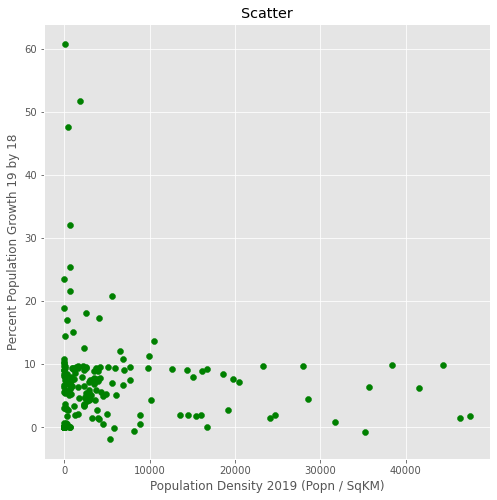

In [74]:
# community_pop_filtered = community_pop[(community_pop['PopGrowth19by18'] <= 100) & (community_pop['PopGrowth19by18'] > -2)]
# community_pop_filtered = community_pop_filtered[(community_pop['Pop2019density'] > 0) & (community_pop['Pop2019density'] <= 50000)]

community_pop_filtered = community_pop[(community_pop['PopGrowth19by18'] <= 100) & (community_pop['PopGrowth19by18'] > -2) & 
                                       (community_pop['Pop2019density'] > 0) & (community_pop['Pop2019density'] <= 50000)]



plt.pyplot.figure(figsize=(8, 8))
plt.pyplot.scatter(community_pop_filtered['Pop2019density'], community_pop_filtered['PopGrowth19by18'], color='green')

# set x/y labels and plot title
            
plt.pyplot.xlabel("Population Density 2019 (Popn / SqKM)")
#plt.pyplot.xticks(rotation=90)
plt.pyplot.ylabel("Percent Population Growth 19 by 18")
plt.pyplot.title("Scatter")

In [75]:
community_pop.to_csv("Dxb_Community_Popn_FinalDF.csv")

In [76]:
community_pop_ind=community_pop
community_pop_ind['Counter']=1

#pivot_count= community_pop.pivot_table(values="Counter", index="PopGrowthbinned", columns="PopDensitybinned", aggfunc=sum) # Gives the names of Commnunities
pivot_count= community_pop.pivot_table(values="Counter", index="PopGrowthbinned", columns="PopDensitybinned", aggfunc=sum, fill_value=0) # Gives the No of Commnunities
pivot_count

PopDensitybinned,x = 0,0< x <= 10,10 < x <1000,1000 < x <= 10k,10k < x <= 50k,> 50k
PopGrowthbinned,,,,,,
x <= -20,0,0,1,0,0,0
-20< x <= -2,0,0,2,0,1,0
-2 < x <=2,3,37,14,10,11,2
2 < x <= 20,0,10,32,67,18,4
20 < x <= 100,0,0,6,2,0,0
> 100,0,0,6,0,0,0


In [77]:
# pivot_count.to_csv("Dxb_Community_Popn_PIVOT.csv") #Output the Pivot if reqd

In [78]:
%%capture
! pip install seaborn

import seaborn as sns

<AxesSubplot:xlabel='Sector', ylabel='Pop2019'>

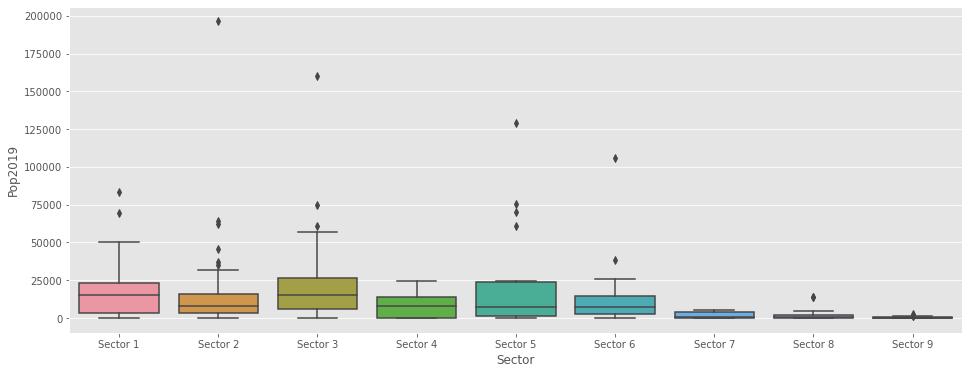

In [79]:
plt.pyplot.figure(figsize=(16, 6))
sns.boxplot(x="Sector", y="Pop2019", data=community_pop, order=["Sector 1", "Sector 2", "Sector 3","Sector 4", "Sector 5", "Sector 6","Sector 7","Sector 8","Sector 9"])

<AxesSubplot:xlabel='Sector', ylabel='Pop2019density'>

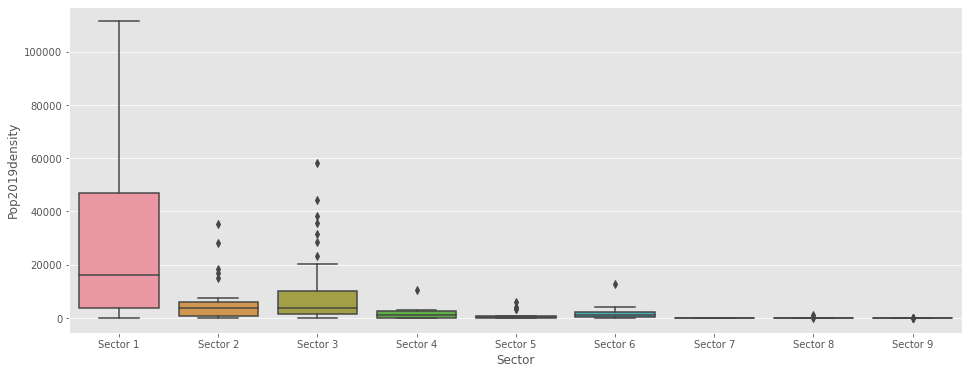

In [80]:
plt.pyplot.figure(figsize=(16, 6))
sns.boxplot(x="Sector", y="Pop2019density", data=community_pop, order=["Sector 1", "Sector 2", "Sector 3","Sector 4", "Sector 5", "Sector 6","Sector 7","Sector 8","Sector 9"])

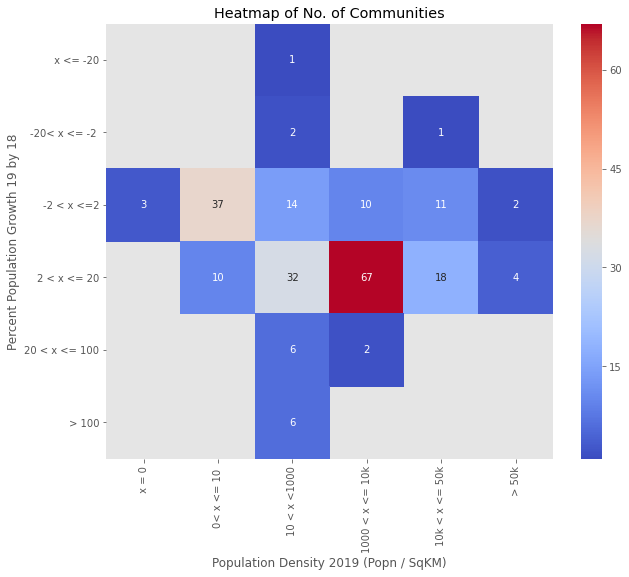

In [81]:
pivot_count1=pivot_count.replace(0,np.NaN) # inserted NaN for values which are Zero

fig, ax = plt.pyplot.subplots(figsize=(10, 8))

sns.heatmap(pivot_count1, annot=True, cmap='coolwarm')

#im = ax.pcolor(pivot_count, cmap='coolwarm')

# Color Map Ref : https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

#label names
row_labels = pivot_count1.columns
col_labels = pivot_count1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot_count1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot_count1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.pyplot.xlabel("Population Density 2019 (Popn / SqKM)")
plt.pyplot.ylabel("Percent Population Growth 19 by 18")
plt.pyplot.title("Heatmap of No. of Communities")

#rotate label if too long
plt.pyplot.xticks(rotation=90)

#fig.colorbar(im)
plt.pyplot.show()